In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def load_qb_data():
    data = pd.read_csv('qb_data.csv', index_col=0)
    data = data[data['YDS'] > 10]
    data = data[data['ATT'] > 3]
    data = data.fillna(0)
    return data

df = load_qb_data()

In [52]:
def load_wr_data():
    data = pd.read_csv('wr_full.csv', index_col=0)
    data = data.dropna()
    return data

df1 = load_wr_data()

In [ ]:

def plot_features_over_time(df, features):
    df['Year'] = df['Year'].astype(int)

    df_grouped_med = df.groupby('Year')[features].median()
    df_grouped_max = df.groupby('Year')[features].max()
    df_grouped_mean = df.groupby('Year')[features].mean() 

    plt.figure(figsize=(10, 6))
    
    plt.plot(df_grouped_med.index, df_grouped_med[features], label=features)
    plt.plot(df_grouped_mean.index, df_grouped_mean[features], label=features)
    plt.plot(df_grouped_max.index, df_grouped_max[features], label=features)
    
    plt.title("")
    plt.xlabel("Season")
    plt.ylabel("Value")
    plt.legend(['Median','Mean','Max'])
    plt.grid(True)

    plt.xlim(df_grouped_med.index.min(), df_grouped_med.index.max())
    plt.xticks(df_grouped_med.index.unique())
    
    plt.show()


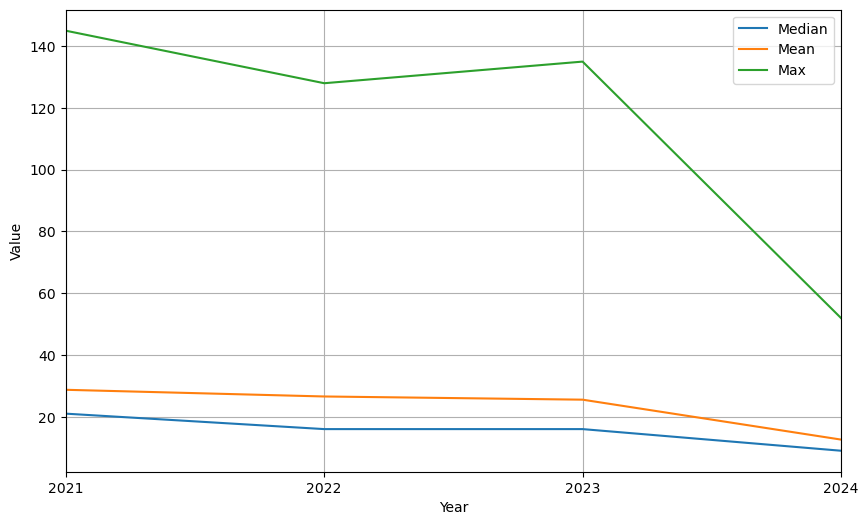

In [61]:
plot_features_over_time(df1, ['Receptions'])

In [53]:
df1

,Reciever,Team,Games,Year,Receptions,REC_YDS,REC_TDS,REC_YAC,Targets
0,Brock Bowers,Las Vegas Raiders,8.0,2024.0,52,535,1,280,65
1,Garrett Wilson,New York Jets,8.0,2024.0,51,573,3,227,84
2,Chris Godwin,Tampa Bay Buccaneers,7.0,2024.0,50,576,5,350,62
3,Ja'Marr Chase,Cincinnati Bengals,8.0,2024.0,48,674,7,302,59
4,Drake London,Atlanta Falcons,8.0,2024.0,48,525,5,143,68
...,...,...,...,...,...,...,...,...,...
1950,Kyler Murray,Arizona Cardinals,14.0,2021.0,0,7,0,7,0
1956,Stephen Sullivan,Carolina Panthers,3.0,2021.0,0,0,0,0,1
1958,Mike White,New York Jets,4.0,2021.0,0,0,0,0,0
1959,Trent Williams,San Francisco 49ers,15.0,2021.0,0,0,0,0,1


In [27]:
df

,QB,Team,GP,Year,ATT(R),YDS(R),YPC,TDs(R),YDS,ATT,YPA,CMP,TDs,INTs,QBR,SCK
0,Geno Smith,Seattle Seahawks,8,2024,30,177,5.9,1,2197,308,7.1,212,8,7,88.4,21
1,Baker Mayfield,Tampa Bay Buccaneers,8,2024,29,169,5.8,2,2189,284,7.7,202,21,9,104.9,20
2,Kirk Cousins,Atlanta Falcons,8,2024,14,8,0.6,0,2106,271,7.8,185,14,7,97.8,15
3,Brock Purdy,San Francisco 49ers,8,2024,42,210,5,3,2101,242,8.7,156,10,7,93.7,15
4,Lamar Jackson,Baltimore Ravens,8,2024,81,501,6.2,2,2099,236,8.9,158,17,2,115.4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Case Keenum,Cleveland Browns,2,2020,0,0,0,0,46,10,4.6,5,0,0,62.9,0
393,Geno Smith,Seattle Seahawks,1,2020,2,-2,-1,0,33,5,6.6,4,0,0,94.2,1
395,Nathan Peterman,Las Vegas Raiders,1,2020,1,9,9,0,25,5,5.0,3,0,0,72.9,2
396,Jacoby Brissett,Indianapolis Colts,11,2020,17,19,1.1,3,17,8,2.1,2,0,0,39.6,2
